# **Data preparation**

___
- Oscar Josue Rocha Hernandez
- Rafael Takata Garcia
- Esteban Gomez Valerio

Ahora, procedamos con una preparación de los datos que vimos en **01_eda_inicial.ipynb**.

##### Librerias

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import os

Traemos los datos desde la carpeta de data:

In [2]:
df = pd.read_csv("../data/raw/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Gracias al análisis pasado, sabemos que estas son las variables catégoricas y númericas.

In [4]:
df['native.country']

0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
32556    United-States
32557    United-States
32558    United-States
32559    United-States
32560    United-States
Name: native.country, Length: 32561, dtype: object

In [5]:
columnas_cat = ['workclass', 'education', 'marital.status', 'occupation', 'race', 'relationship', 'sex', 'income', 'native.country']
columnas_num = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Primero, convertamos las variables catégoricas a númericas a través de `LabelEncoder` o `OrdinalEncoder`, veamos cual es cual:

In [6]:
for col in columnas_cat:
    print(f"Columna: {col}")
    print(df[col].unique())
    print("-" * 40)

Columna: workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
----------------------------------------
Columna: education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
----------------------------------------
Columna: marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
----------------------------------------
Columna: occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
----------------------------------------
Columna: race
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
-------------------------

Podemos ver que la única variable ordinal es `education`, pero contamos con una variable llamada `education.num` por lo que podemos tirar esa variable

In [7]:
df = df.drop("education", axis=1)

Definimos el objeto

In [8]:
nominal_encoder = LabelEncoder()

El resto de estas variables las podriamos hacer sin un orden catégorico. 

In [9]:
nom_categories = [col for col in columnas_cat if col != "education"]
nom_categories

['workclass',
 'marital.status',
 'occupation',
 'race',
 'relationship',
 'sex',
 'income',
 'native.country']

In [10]:
for col in nom_categories:
    df[col] = nominal_encoder.fit_transform(df[col])
df[nom_categories]

,workclass,marital.status,occupation,race,relationship,sex,income,native.country
0,0,6,0,4,1,0,0,39
1,4,6,4,4,1,0,0,39
2,0,6,0,2,4,0,0,39
3,4,0,7,4,4,0,0,39
4,4,5,10,4,3,0,0,39
...,...,...,...,...,...,...,...,...
32556,4,4,11,4,1,1,0,39
32557,4,2,13,4,5,0,0,39
32558,4,2,7,4,0,1,1,39
32559,4,6,1,4,4,0,0,39


Veamos los tipos de valores que quedan en el dataframe:

In [11]:
df.dtypes 

age               int64
workclass         int64
fnlwgt            int64
education.num     int64
marital.status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int64
income            int64
dtype: object

Ya que tenemos todas las variables de forma númerica, las pondremos en la misma escala a través de un `StandardScaler`

In [12]:
scaler = StandardScaler()

In [13]:
for col in df.columns:
    df[col] = scaler.fit_transform(df[[col]])

df.describe()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.793203e-17,1.274399e-16,-9.928962e-17,1.466431e-16,-1.379144e-16,1.204569e-16,-3.491503e-17,-1.972699e-16,-8.379608e-17,5.586405e-17,-5.586405e-17,-2.444052e-17,2.147275e-16,-6.983007e-18
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-2.657320e+00,-1.681631e+00,-3.529656e+00,-1.734058e+00,-1.554283e+00,-9.001808e-01,-4.318909e+00,-1.422331e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00,-4.693310e+00,-5.631985e-01
25%,-7.757679e-01,9.005041e-02,-6.816910e-01,-4.200596e-01,-4.062122e-01,-8.448608e-01,-9.001808e-01,3.936675e-01,-1.422331e+00,-1.459205e-01,-2.166595e-01,-3.542945e-02,2.915686e-01,-5.631985e-01
50%,-1.159546e-01,9.005041e-02,-1.082193e-01,-3.136003e-02,-4.062122e-01,1.010359e-01,-2.778050e-01,3.936675e-01,7.030713e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02,2.915686e-01,-5.631985e-01
75%,6.904838e-01,9.005041e-02,4.478765e-01,7.460392e-01,9.216339e-01,8.104583e-01,9.669466e-01,3.936675e-01,7.030713e-01,-1.459205e-01,-2.166595e-01,3.695194e-01,2.915686e-01,-5.631985e-01
max,3.769612e+00,2.837421e+00,1.226856e+01,2.300838e+00,2.249480e+00,1.756355e+00,2.211698e+00,3.936675e-01,7.030713e-01,1.339458e+01,1.059351e+01,4.742967e+00,5.472033e-01,1.775573e+00


Veamos como se ven:

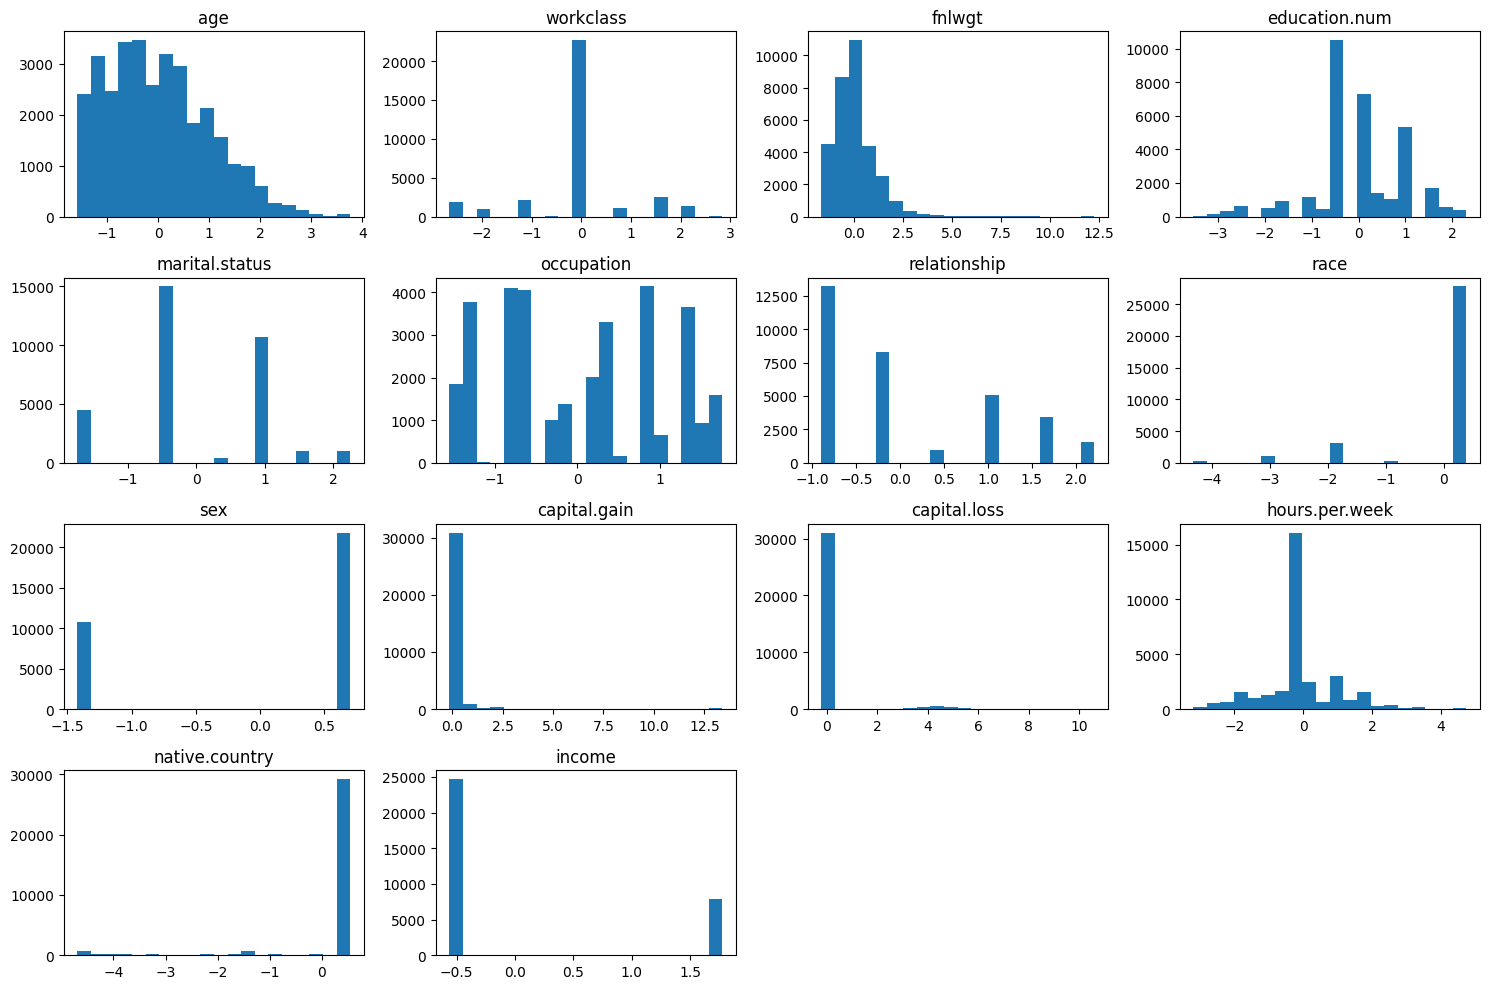

In [14]:
df.hist(figsize=(15, 10), bins=20, grid=False)

plt.tight_layout() 
plt.show()

Ahora podemos hacer una prueba de correlación:

<Axes: >

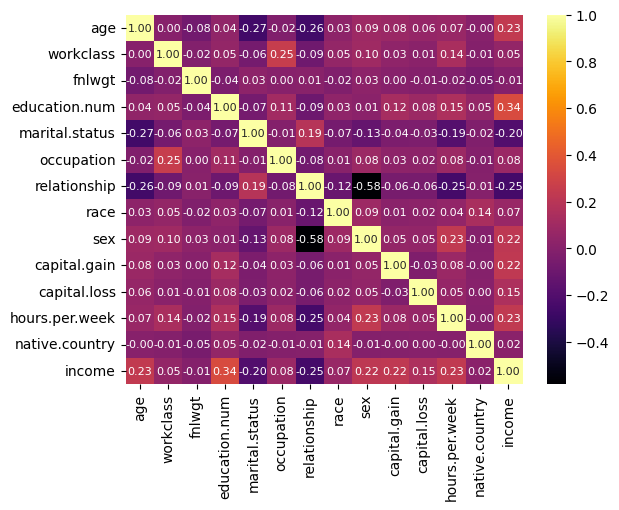

In [15]:
sns.heatmap(df.corr(), cmap="inferno", annot=True, annot_kws={"size": 8},         
    fmt=".2f",)

Quitamos las variables que tengan un valor menor o mayor a **0.2**

In [16]:
def drop_low_correlation(df, target_col, threshold=0.1):
    """
    Elimina columnas cuya correlación absoluta con la columna objetivo
    sea menor que el umbral (threshold).
    
    Parámetros:
    - df: DataFrame
    - target_col: nombre de la columna objetivo (str)
    - threshold: umbral mínimo de correlación (float)
    
    Retorna:
    - df reducido con las columnas que cumplen el umbral
    """
    
    corr_with_target = df.corr()[target_col].abs()
    cols_to_keep = corr_with_target[corr_with_target >= threshold].index.tolist()
    df_reduced = df[cols_to_keep].copy()
    
    return df_reduced


In [17]:
df_reduced = drop_low_correlation(df, "income", 0.2)
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   education.num   32561 non-null  float64
 2   relationship    32561 non-null  float64
 3   sex             32561 non-null  float64
 4   capital.gain    32561 non-null  float64
 5   hours.per.week  32561 non-null  float64
 6   income          32561 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


Veamos cómo quedó:

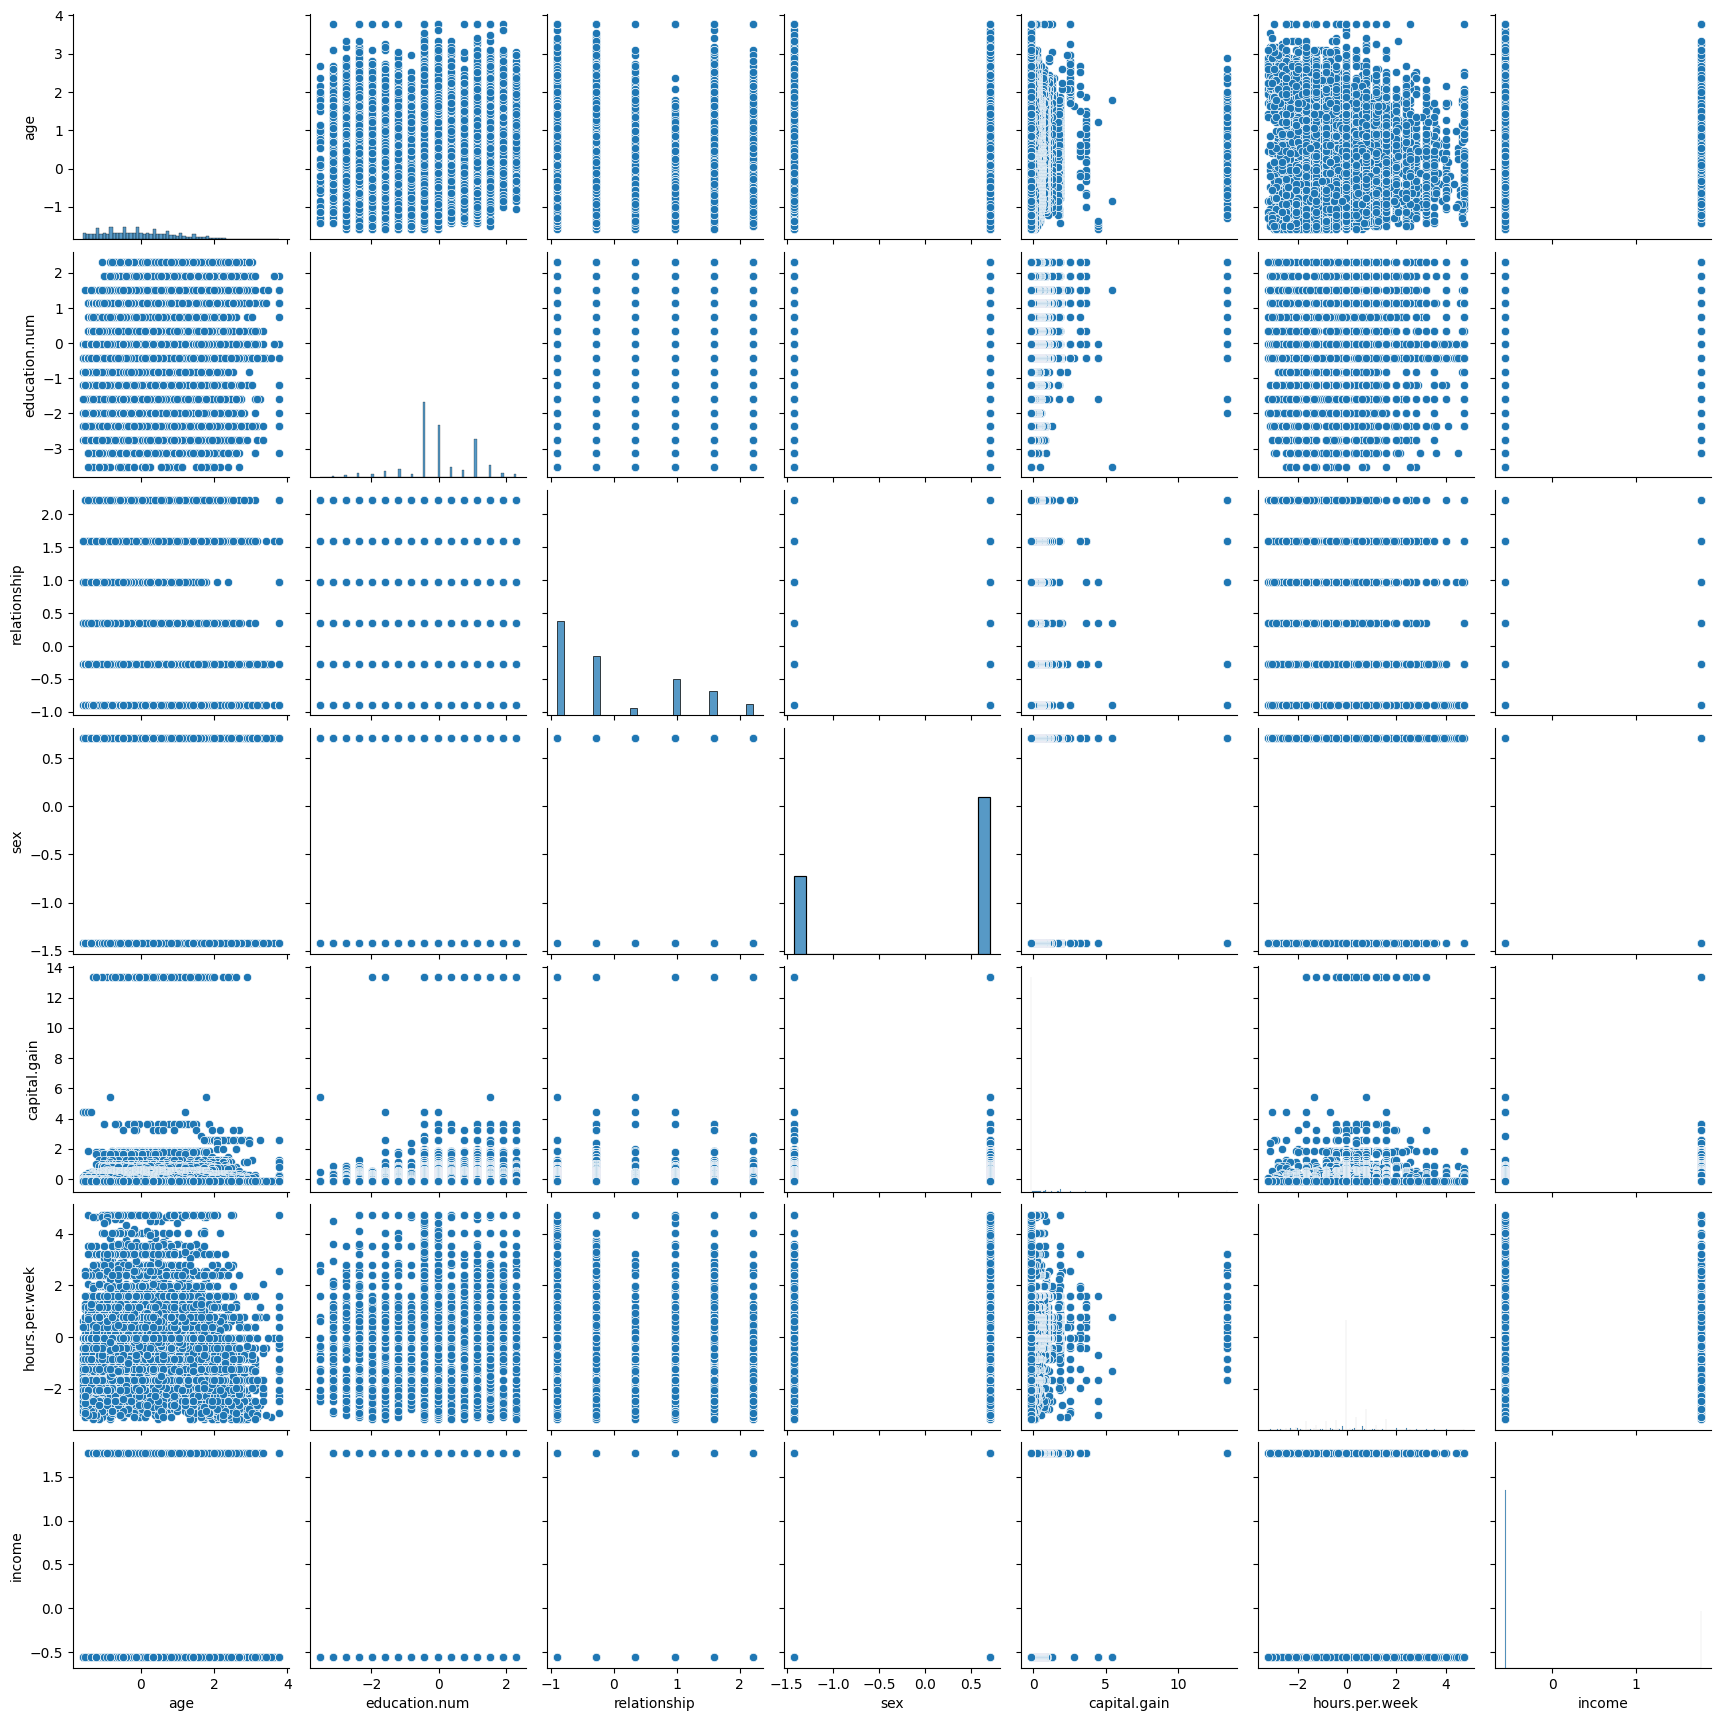

In [18]:
sns.pairplot(df_reduced)

Guardamos nuestro Dataframe después del procesamiento.

In [ ]:
df_reduced.to_csv("../data/processed/pre_processed_data.csv", index=False)